In [12]:
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq

## Reading all the Json files

In [14]:
df_business = pd.read_json(
    r"C:\Users\rubak\OneDrive\Documents\NLP Final Project\CS554_NLP_Final_Project\datasets\yelp_academic_dataset_business.json", 
    lines=True
)
df_business.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object')

In [15]:
df_business.to_parquet(r"C:\Users\rubak\OneDrive\Documents\NLP Final Project\CS554_NLP_Final_Project\datasets\business.parquet")

In [16]:
file_path = r"C:\Users\rubak\OneDrive\Documents\NLP Final Project\CS554_NLP_Final_Project\datasets\yelp_academic_dataset_review.json"
parquet_path = r"C:\Users\rubak\OneDrive\Documents\NLP Final Project\CS554_NLP_Final_Project\datasets\reviews.parquet"
# saving as pqt bc its better
chunk_size = 100_000 # reading 100000 lines at a time
reader = pd.read_json(file_path, lines=True, chunksize=chunk_size)

parquet_writer = None

for i, chunk in enumerate(reader):
    table = pa.Table.from_pandas(chunk)

    if i == 0:
        parquet_writer = pq.ParquetWriter(parquet_path, table.schema)
    
    parquet_writer.write_table(table)

if parquet_writer is not None:
    parquet_writer.close()

In [17]:
df_reviews = pd.read_parquet(r"C:\Users\rubak\OneDrive\Documents\NLP Final Project\CS554_NLP_Final_Project\datasets\reviews.parquet")
df_reviews.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date'],
      dtype='object')

In [18]:
df_reviews.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [19]:
file_path = r"C:\Users\rubak\OneDrive\Documents\NLP Final Project\CS554_NLP_Final_Project\datasets\yelp_academic_dataset_user.json"
parquet_path = r"C:\Users\rubak\OneDrive\Documents\NLP Final Project\CS554_NLP_Final_Project\datasets\user.parquet"
# saving as pqt bc its better
chunk_size = 100_000 # reading 100000 lines at a time
reader = pd.read_json(file_path, lines=True, chunksize=chunk_size)

parquet_writer = None

for i, chunk in enumerate(reader):
    table = pa.Table.from_pandas(chunk)

    if i == 0:
        parquet_writer = pq.ParquetWriter(parquet_path, table.schema)
    
    parquet_writer.write_table(table)

if parquet_writer is not None:
    parquet_writer.close()

In [20]:
df_user = pd.read_parquet(r"C:\Users\rubak\OneDrive\Documents\NLP Final Project\CS554_NLP_Final_Project\datasets\user.parquet")
df_user.columns

Index(['user_id', 'name', 'review_count', 'yelping_since', 'useful', 'funny',
       'cool', 'elite', 'friends', 'fans', 'average_stars', 'compliment_hot',
       'compliment_more', 'compliment_profile', 'compliment_cute',
       'compliment_list', 'compliment_note', 'compliment_plain',
       'compliment_cool', 'compliment_funny', 'compliment_writer',
       'compliment_photos'],
      dtype='object')

In [21]:
df_user.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0


## Constricting Reviews to 2020+
- want to also see hotspot cities

In [22]:
# cutting down reviews for only starting 2020
df_reviews["date"] = pd.to_datetime(df_reviews["date"])
df_reviews = df_reviews[df_reviews["date"] >= "2020-01-01"]
df_reviews.to_parquet(r"C:\Users\rubak\OneDrive\Documents\NLP Final Project\CS554_NLP_Final_Project\datasets\reviews_2020.parquet")

In [23]:
# checking for missing values
print(df_business.isnull().sum())
print(df_reviews.isnull().sum())
print(df_user.isnull().sum())

business_id         0
name                0
address             0
city                0
state               0
postal_code         0
latitude            0
longitude           0
stars               0
review_count        0
is_open             0
attributes      13744
categories        103
hours           23223
dtype: int64
review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64
user_id               0
name                  0
review_count          0
yelping_since         0
useful                0
funny                 0
cool                  0
elite                 0
friends               0
fans                  0
average_stars         0
compliment_hot        0
compliment_more       0
compliment_profile    0
compliment_cute       0
compliment_list       0
compliment_note       0
compliment_plain      0
compliment_cool       0
compliment_funny      0
compliment_writer     0
complimen

In [24]:
df_business

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150341,IUQopTMmYQG-qRtBk-8QnA,Binh's Nails,3388 Gateway Blvd,Edmonton,AB,T6J 5H2,53.468419,-113.492054,3.0,13,1,"{'ByAppointmentOnly': 'False', 'RestaurantsPri...","Nail Salons, Beauty & Spas","{'Monday': '10:0-19:30', 'Tuesday': '10:0-19:3..."
150342,c8GjPIOTGVmIemT7j5_SyQ,Wild Birds Unlimited,2813 Bransford Ave,Nashville,TN,37204,36.115118,-86.766925,4.0,5,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Pets, Nurseries & Gardening, Pet Stores, Hobby...","{'Monday': '9:30-17:30', 'Tuesday': '9:30-17:3..."
150343,_QAMST-NrQobXduilWEqSw,Claire's Boutique,"6020 E 82nd St, Ste 46",Indianapolis,IN,46250,39.908707,-86.065088,3.5,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Shopping, Jewelry, Piercing, Toy Stores, Beaut...",None
150344,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,2472 Troy Rd,Edwardsville,IL,62025,38.782351,-89.950558,4.0,24,1,"{'BusinessParking': '{'garage': False, 'street...","Fitness/Exercise Equipment, Eyewear & Optician...","{'Monday': '9:0-20:0', 'Tuesday': '9:0-20:0', ..."


In [25]:
city_counts = df_business["city"].value_counts()
city_counts.sort_values(ascending=False).head(5)

city
Philadelphia    14569
Tucson           9250
Tampa            9050
Indianapolis     7540
Nashville        6971
Name: count, dtype: int64

In [26]:
top_5_cities = ["Philadelphia", "Tucson", "Tampa", "Indianapolis", "Nashville"]
df_business_top5 = df_business[df_business['city'].isin(top_5_cities)]
df_business_top5.shape

(47380, 14)

In [27]:
valid_business_ids = set(df_business_top5['business_id'])
df_reviews_top5 = df_reviews[df_reviews['business_id'].isin(valid_business_ids)]
df_reviews_top5.shape

(423177, 9)

In [28]:
valid_user_ids = set(df_reviews_top5['user_id'])
df_user_top5 = df_user[df_user['user_id'].isin(valid_user_ids)]
df_user_top5.shape

(203482, 22)

In [29]:
# Sending everything to parquet
df_reviews_top5.to_parquet(r"C:\Users\rubak\OneDrive\Documents\NLP Final Project\CS554_NLP_Final_Project\datasets\reviews_top5_cities.parquet")
df_user_top5.to_parquet(r"C:\Users\rubak\OneDrive\Documents\NLP Final Project\CS554_NLP_Final_Project\datasets\users_top5_cities.parquet")
df_business_top5.to_parquet(r"C:\Users\rubak\OneDrive\Documents\NLP Final Project\CS554_NLP_Final_Project\datasets\business_top5_cities.parquet")

In [30]:
# merging into one big dataset
df_merged = df_reviews_top5.merge(
    df_business_top5,
    on="business_id",
    how="inner",
    suffixes=("_rev", "_biz")
)

df_merged = df_merged.merge(
    df_user_top5,
    on="user_id",
    how="left",
    suffixes=("", "_user")  
)

print(df_merged.shape)
df_merged.head()

(423177, 43)


,review_id,user_id,business_id,stars_rev,useful,funny,cool,text,date,name,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,aYBXcBLfKHbu1QHzzyZ89w,u90a_d9N0zUHnbc0xQSXrw,y3iKFTk_sgIXCT6fNcBn_Q,2,0,0,0,I'm giving this two stars because the food was...,2020-01-19 01:56:55,Chili's,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,-Lfzihr6QrM9T_-v545BXQ,xjwwnTFbXNfMlONozTtvsA,v_AbyvMdKUi_ac4A8nkG-A,5,0,0,0,"Best spot on Broadway! Great music, great vibe...",2020-01-18 16:34:35,Jason Aldean's Kitchen + Rooftop Bar,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,oWDdas4YeTAvmJremuLIiA,1ZniEo5Z4nBY2wnI2tkv6A,Zx7n8mdt8OzLRXVzolXNhQ,5,2,0,1,"With an hour and a half wait on a Sunday, I kn...",2020-01-03 20:44:08,Milk and Honey Nashville,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0
3,qVFtLb3tNmPMZqZ7ZZBqlA,G0WtPpw7G54gn6mQfrMSeA,1T9F7iLDFAYWJvif1RKneg,5,0,0,1,I have not been here to the actual location ye...,2020-01-28 16:31:47,Saigon Restaurant,...,0.0,0.0,0.0,0.0,3.0,1.0,1.0,1.0,0.0,1.0
4,naVRqPF6UJX8V75oArBrRQ,lfzMtMFcHJAZyKp4vAyxKQ,GMVVFox3a0ROMdofd68mZw,1,0,1,0,"IMHO, This company hires unskilled locksmiths ...",2020-01-03 23:03:57,Affordable Lock & Security Solutions - Tampa,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
df_merged.to_parquet(r"C:\Users\rubak\OneDrive\Documents\NLP Final Project\CS554_NLP_Final_Project\datasets\final_dataset.parquet")

### Prelim Analysis

In [32]:
# user review stars:
df_merged["stars_rev"].value_counts()


stars_rev
5    227641
1     78924
4     59891
3     30224
2     26497
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

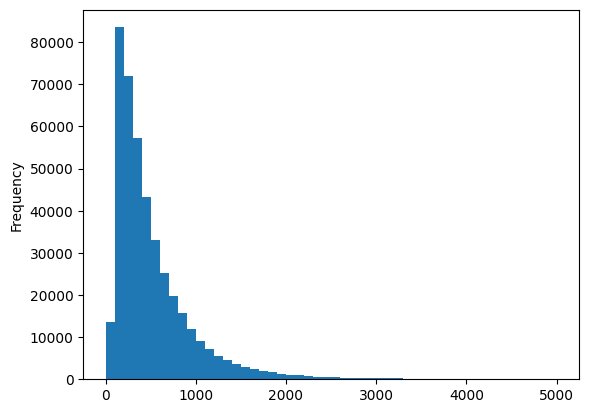

In [33]:
df_merged["text_length"] = df_merged["text"].str.len()
df_merged["text_length"].describe()
df_merged["text_length"].plot(kind="hist", bins=50)


<Axes: xlabel='date'>

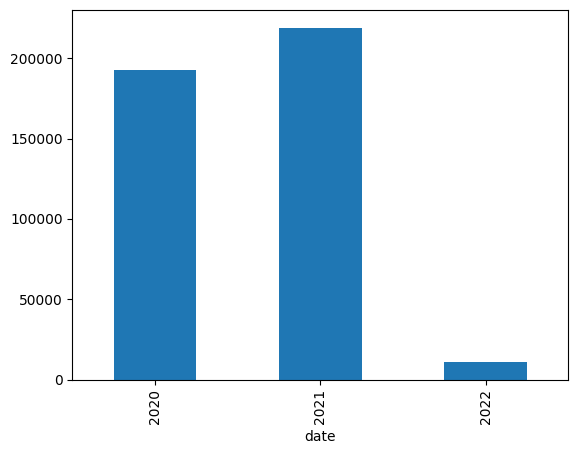

In [34]:
df_merged["date"].dt.year.value_counts().sort_index().plot(kind="bar")


In [35]:
top_businesses = df_merged.groupby("business_id")["review_id"].count().sort_values(ascending=False).head(10)
print(top_businesses)

business_id
GXFMD0Z4jEVZBCsbPf4CTQ    840
1b5mnK8bMnnju_cvU65GqQ    751
L5LLN0RafiV1Z9cddzvuCw    621
0uL-FXY1M2UC12eZcFlTuQ    597
xlMQBBt9wrtahdqiRDcVSg    532
3YqUe2FTCQr0pPVK8oCv6Q    515
9JrZDH4Mq0BXQ2GYIJmo-g    511
ytynqOUb3hjKeJfRj5Tshw    501
RQAF6a0akMiot5lZZnMNNw    493
C9K3579SJgLPp0oAOM29wg    480
Name: review_id, dtype: int64


In [36]:
top_users = df_merged.groupby("user_id")["review_id"].count().sort_values(ascending=False).head(10)
print(top_users)

user_id
R7NM7vIyUfSTXvMsw7jNTA    318
Sp2GV7D-_JLZMPQmDanzPQ    249
leMOR7VSm5z-0r60iJ90EA    228
xalgcjscRLNPuyaAeKNThA    224
WwulXySQN8t2hwqH_yWurA    212
nWRDqA-XXdju1jOMnN7QcA    208
vffKQc_WQMYFGY4JS5VAOw    200
kauJmG3ZiA-m5u0nPrjb4g    199
0YI3p9o-ntRgRaPWpfa22Q    197
fr1Hz2acAb3OaL3l6DyKNg    186
Name: review_id, dtype: int64


<Axes: xlabel='city'>

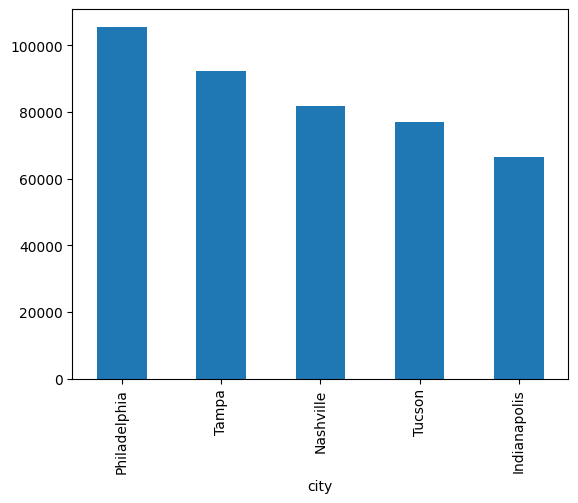

In [37]:
city_counts = df_merged["city"].value_counts()
city_counts.head(5).plot(kind="bar")

C:\Users\rubak\AppData\Local\Temp\ipykernel_1608\1705888724.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_merged.set_index("date").resample("M")["review_id"].count().plot()


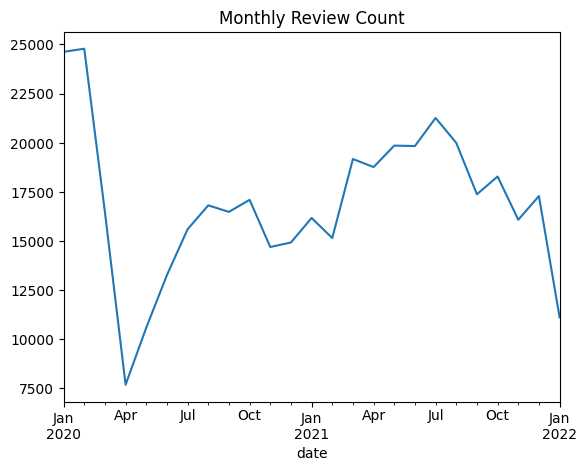

In [ ]:
import matplotlib.pyplot as plt
df_merged.set_index("date").resample("M")["review_id"].count().plot()
plt.title("Monthly Review Count")
plt.show()


In [44]:
df_merged

,review_id,user_id,business_id,stars_rev,useful,funny,cool,text,date,name,...,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,text_length
0,aYBXcBLfKHbu1QHzzyZ89w,u90a_d9N0zUHnbc0xQSXrw,y3iKFTk_sgIXCT6fNcBn_Q,2,0,0,0,I'm giving this two stars because the food was...,2020-01-19 01:56:55,Chili's,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1562
1,-Lfzihr6QrM9T_-v545BXQ,xjwwnTFbXNfMlONozTtvsA,v_AbyvMdKUi_ac4A8nkG-A,5,0,0,0,"Best spot on Broadway! Great music, great vibe...",2020-01-18 16:34:35,Jason Aldean's Kitchen + Rooftop Bar,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,116
2,oWDdas4YeTAvmJremuLIiA,1ZniEo5Z4nBY2wnI2tkv6A,Zx7n8mdt8OzLRXVzolXNhQ,5,2,0,1,"With an hour and a half wait on a Sunday, I kn...",2020-01-03 20:44:08,Milk and Honey Nashville,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0,1657
3,qVFtLb3tNmPMZqZ7ZZBqlA,G0WtPpw7G54gn6mQfrMSeA,1T9F7iLDFAYWJvif1RKneg,5,0,0,1,I have not been here to the actual location ye...,2020-01-28 16:31:47,Saigon Restaurant,...,0.0,0.0,0.0,3.0,1.0,1.0,1.0,0.0,1.0,628
4,naVRqPF6UJX8V75oArBrRQ,lfzMtMFcHJAZyKp4vAyxKQ,GMVVFox3a0ROMdofd68mZw,1,0,1,0,"IMHO, This company hires unskilled locksmiths ...",2020-01-03 23:03:57,Affordable Lock & Security Solutions - Tampa,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423172,tWCi4N2qCil876BI2NDAZg,5d32aJe0a3_fSl3LIVYkWQ,EmrOCT7fArKI0JI_XF6aaw,1,5,2,0,Temple University blatantly disregards freedom...,2021-08-28 18:46:05,Temple University,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,144
423173,99ylx-qPUSseITqBye2MpA,-AkziDwQ8hv2COTDBBUpig,aunmz06iWvo3bd6MMHEbqg,3,0,0,0,Philly has become a dangerous place with the m...,2022-01-18 03:48:44,Rivers Casino Philadelphia,...,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2.0,1433
423174,MIXdpbbCTRAVdi8RiMjwdg,s67G457QlHSvk5RjOMN91w,58MJvmfo5hyfBbvkr54sFA,5,1,0,0,Great gym. Was in Indy for 4 days on business...,2022-01-18 15:24:44,Anytime Fitness,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,388
423175,zHZ-A1qyKDEgyZMDaD--wg,_XVdmFWSgTN6YlojUxixTA,6WaI-IN8ql0xpEKlb4q8tg,5,1,0,0,We redesigned my moms dress and mad it complet...,2022-01-17 20:59:01,The House of Bretón,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,209


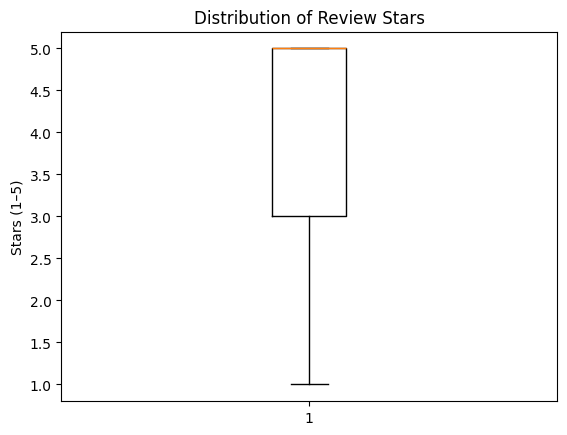

In [47]:
average_rating = df_merged["stars_biz"].mean()
plt.boxplot(df_merged["stars_rev"])  
plt.title("Distribution of Review Stars")
plt.ylabel("Stars (1–5)")
plt.show()
